### Importing libraries

In [1327]:
import pandas as pd
import numpy as np 
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import json
import tweepy
from tweepy import OAuthHandler
import os
import time
import datetime
from timeit import default_timer as timer
import seaborn as sns


### GATHERING DATA

# 1. Twitter Archive File 

In [1328]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

## 2. Image Prediction File

In [1329]:
#By Downloading programatically through udacity hosted servers
url=" https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open ('image_predictions.tsv', mode = 'wb') as f:
    f.write(response.content)
    
#
image_Prediction = pd.read_csv('image_predictions.tsv', sep='\t')


# 3. Twitter Json Data

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [1330]:
json=pd.read_json('tweet-json.txt',lines=True)
json.sample(5)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
2255,NaN,NaN,2015-11-20 15:36:22,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667728195987177472, 'id_str'...",398,False,Meet Olive. He comes to spot by tree to remini...,NaN,...,0.0,NaN,NaN,NaN,162,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1249,NaN,NaN,2016-03-19 01:11:29,"[0, 108]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 710997081670823936, 'id_str'...",4960,False,Meet Milo and Amos. They are the best of pals....,NaN,...,0.0,NaN,NaN,NaN,1561,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
267,NaN,NaN,2017-03-14 00:04:30,"[0, 119]","{'hashtags': [{'text': 'K9VeteransDay', 'indic...","{'media': [{'id': 841439843452387328, 'id_str'...",13755,False,Here we have some incredible doggos for #K9Vet...,NaN,...,0.0,NaN,NaN,NaN,4168,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
459,NaN,NaN,2017-01-07 16:59:28,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 817777588030476288, 'id_str'...",11901,False,"This is Dido. She's playing the lead role in ""...",NaN,...,0.0,NaN,NaN,NaN,3084,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1108,NaN,NaN,2016-05-21 00:50:46,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 733822298390548480, 'id_str'...",4015,False,This is Moose. He's a Polynesian Floofer. Dapp...,NaN,...,0.0,NaN,NaN,NaN,1141,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [1331]:
tweet_json = pd.DataFrame(json, columns=['id','favorite_count','retweet_count'])
tweet_json.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


**Visual Assessmet**

In [1332]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [1333]:
image_Prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [1334]:
tweet_json

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
5,891087950875897856,20562,3261
6,890971913173991426,12041,2158
7,890729181411237888,56848,16716
8,890609185150312448,28226,4429
9,890240255349198849,32467,7711


**Programmatic Assesment**

In [1335]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [1336]:
image_Prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [1337]:
#checking duplicate values for jpg_url column
sum(image_Prediction.jpg_url.duplicated())

66

In [1338]:
pd.concat(g for _, g in image_Prediction.groupby("jpg_url") if len(g) > 1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1691,815966073409433600,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1703,817181837579653120,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1705,817423860136083457,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1858,841833993020538882,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1715,819004803107983360,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
1718,819015337530290176,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True


In [1339]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [1340]:
twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [1341]:
twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [1342]:

twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [1343]:
twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [1344]:
image_Prediction.p1_dog.value_counts()


True     1532
False     543
Name: p1_dog, dtype: int64

In [1345]:
image_Prediction.p2_dog.value_counts()


True     1553
False     522
Name: p2_dog, dtype: int64

In [1346]:
image_Prediction.p3_dog.value_counts()


True     1499
False     576
Name: p3_dog, dtype: int64

# Quality issues

## twitter_archive' table
##### Keep original ratings (no retweets) that have images
###### I can see missing values in (in_reply_to_status_id , in_reply_to_user_id , retweeted_status_id , retweeted_status_user_id , retweeted_status_timestamp )
#### Timestamp should be datetime datatype not a object datatype.
#### The null values inside the doggo , floofer , pupper , puppo  columns are seen as None but we can change it to value(Null).

## image_pred' table
#### Nondescriptive column headers p1, p2, p3, p1_conf, p2_conf, p3_conf, p1_dog, p2_dog, p3_dog .
#### The columns p1,p2 and p3 are various breeds of dogs and hence must be categorical instead of object type.
#### The columns p1_dog, p2_dog and p3_dog must be of type bool.
#### create  1 column for image prediction and 1 column for confidence level

## tweet_json table
#### For the tweet jason table there are no null values and datatypes are clear

## Tidiness
#### All three data tables should be in one dataframe.
#### We can merge doggo , floofer , pupper , puppo columns  in to one column





# cleaning 

In [1347]:
# Define(making a clean data frame by copying original one)
#code
twitter_archive_clean = twitter_archive.copy()
#test
twitter_archive_clean


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [1348]:
#define (Delete retweets by filtering the NaN of retweeted_status_user_id)

#CODE
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean['retweeted_status_user_id'])]

#TEST
print(sum(twitter_archive_clean.retweeted_status_user_id.value_counts()))

0


In [1349]:
#Define(drop unwanted columns)
#code
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id' , 'retweeted_status_timestamp'], axis=1)
#test
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


In [1350]:
#define ( rating_numerator and Rating _denominator are of type integer they must be changed to type float )
#code
twitter_archive_clean[['rating_numerator', 'rating_denominator']] = twitter_archive_clean[['rating_numerator','rating_denominator']].astype(float)
#test
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: float64(2), int64(1), object(9)
memory usage: 220.9+ KB


In [1351]:
#Define (Create a new column with rating in float type to avoid converting all int column to float)

#code
twitter_archive_clean['rating'] = 10 * twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator'].astype(float)
#test
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None,13.0
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None,13.0
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None,12.0
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None,13.0
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None,12.0


In [1352]:
# Define(replacing the "none" in doggo and floofer and pupper and puppo columns with null)
#code
twitter_archive_clean["doggo"] = twitter_archive_clean["doggo"].replace("None", "")
twitter_archive_clean["floofer"] = twitter_archive_clean["floofer"].replace("None", "")
twitter_archive_clean["pupper"] = twitter_archive_clean["pupper"].replace("None", "")
twitter_archive_clean["puppo"] = twitter_archive_clean["puppo"].replace("None", "")
#test
twitter_archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
461,817536400337801217,2017-01-07 01:00:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Eugene &amp; Patti Melt. No matte...,https://twitter.com/dog_rates/status/817536400...,12.0,10.0,Eugene,,,,,12.0
1632,684460069371654144,2016-01-05 19:42:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeph. He's a Western Sagittarius Dookm...,https://twitter.com/dog_rates/status/684460069...,10.0,10.0,Jeph,,,,,10.0
2002,672481316919734272,2015-12-03 18:23:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Jazz. She should be on the cover ...,https://twitter.com/dog_rates/status/672481316...,12.0,10.0,Jazz,,,pupper,,12.0
1211,715360349751484417,2016-03-31 02:09:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bertson. He just wants to say hi. 11/1...,https://twitter.com/dog_rates/status/715360349...,11.0,10.0,Bertson,,,,,11.0
1290,708130923141795840,2016-03-11 03:22:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending in non canines like this G...,https://twitter.com/dog_rates/status/708130923...,11.0,10.0,None,,,,,11.0


In [1353]:
# Define(By merging  doggo and floofer and pupper and puppo columns to one column)
#code
twitter_archive_clean["dog_stage"] = twitter_archive_clean["doggo"] + twitter_archive_clean["floofer"] + twitter_archive_clean["pupper"] + twitter_archive_clean["puppo"]
#test
twitter_archive_clean["dog_stage"].value_counts()

                1831
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [1354]:
# Define (replace  the space with null)
#code
twitter_archive_clean["dog_stage"] = twitter_archive_clean["dog_stage"].replace('',np.nan)
#test
twitter_archive_clean["dog_stage"].value_counts()

pupper          224
doggo            75
puppo            24
doggopupper      10
floofer           9
doggopuppo        1
doggofloofer      1
Name: dog_stage, dtype: int64

In [1355]:
# Define (i see a non type in dog_stage columns, so i replacing them to understanding them)
 #code
twitter_archive_clean.loc[twitter_archive_clean["dog_stage"] == "doggofloofer", "dog_stage"] = "dpggp, floofer"
twitter_archive_clean.loc[twitter_archive_clean["dog_stage"] == "doggopupper", "dog_stage"] = "doggo, puppo"
twitter_archive_clean.loc[twitter_archive_clean["dog_stage"] == "doggopuppo", "dog_stage"] = "dpggp, puppo"
#test
twitter_archive_clean["dog_stage"].value_counts()

pupper            224
doggo              75
puppo              24
doggo, puppo       10
floofer             9
dpggp, floofer      1
dpggp, puppo        1
Name: dog_stage, dtype: int64

In [1356]:
# Define (after done with merging i drop unwanted coulumns)
#code
twitter_archive_clean = twitter_archive_clean.drop(['doggo','floofer', 'pupper' , 'puppo'],axis=1)
#test
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,13.0,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,13.0,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,12.0,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,13.0,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,12.0,NaN


In [1357]:
# Define (renaming non-descriptive column headers)
#making a clean data frame by copying original one
image_Prediction_clean= image_Prediction.copy()
#code
image_Prediction_clean = image_Prediction_clean.rename(columns =
                            {'p1': 'Possible_breed_1',
                            'p2': 'Possible_breed_2',
                            'p3': 'Possible_breed_3',
                            'p1_conf': 'Breed_1_confidence',
                            'p2_conf': 'Breed_2_confidence',
                            'p3_conf': 'Breed_3_confidence',
                            'p1_dog': 'Breed_1_present',
                            'p2_dog': 'Breed_2_present',
                            'p3_dog': 'Breed_3_present'})
#test
image_Prediction_clean

,tweet_id,jpg_url,img_num,Possible_breed_1,Breed_1_confidence,Breed_1_present,Possible_breed_2,Breed_2_confidence,Breed_2_present,Possible_breed_3,Breed_3_confidence,Breed_3_present
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [1358]:
# Define(Convert Possible_breed_1,Possible_breed_2,Possible_breed_3 to category type)
#code
image_Prediction_clean.Possible_breed_1 = image_Prediction_clean.Possible_breed_1.astype('category')
image_Prediction_clean.Possible_breed_2 = image_Prediction_clean.Possible_breed_2.astype('category')
image_Prediction_clean.Possible_breed_3 = image_Prediction_clean.Possible_breed_3.astype('category')

# Define (Convert Breed_1_present, Breed_2_present, Breed_3_present to the type bool)
#code
image_Prediction_clean.Breed_1_present = image_Prediction_clean.Breed_1_present.astype('bool')
image_Prediction_clean.Breed_2_present = image_Prediction_clean.Breed_2_present.astype('bool')
image_Prediction_clean.Breed_3_present = image_Prediction_clean.Breed_3_present.astype('bool')
#test
image_Prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id              2075 non-null int64
jpg_url               2075 non-null object
img_num               2075 non-null int64
Possible_breed_1      2075 non-null category
Breed_1_confidence    2075 non-null float64
Breed_1_present       2075 non-null bool
Possible_breed_2      2075 non-null category
Breed_2_confidence    2075 non-null float64
Breed_2_present       2075 non-null bool
Possible_breed_3      2075 non-null category
Breed_3_confidence    2075 non-null float64
Breed_3_present       2075 non-null bool
dtypes: bool(3), category(3), float64(3), int64(2), object(1)
memory usage: 174.9+ KB


In [1359]:
#  Define(By creating  1 column for image prediction and 1 column for confidence level
#Create a function where I keep the first true prediction along the confidence level as new columns.)
dog_type = []
confidence_list = []

#code
#create a function with nested if to capture the dog type and confidence level
# from the first 'true' prediction
def image(image_Prediction_clean):
    if image_Prediction_clean['Breed_1_present'] == True:
        dog_type.append(image_Prediction_clean['Possible_breed_1'])
        confidence_list.append(image_Prediction_clean['Breed_1_confidence'])
    elif image_Prediction_clean['Breed_2_present'] == True:
        dog_type.append(image_Prediction_clean['Possible_breed_2'])
        confidence_list.append(image_Prediction_clean['Breed_2_confidence'])
    elif image_Prediction_clean['Breed_3_present'] == True:
        dog_type.append(image_Prediction_clean['Possible_breed_3'])
        confidence_list.append(image_Prediction_clean['Breed_3_confidence'])
    else:
        dog_type.append('Error')
        confidence_list.append('Error')

#series objects having index the image_prediction_clean column.        
image_Prediction_clean.apply(image, axis=1)

#create new columns
image_Prediction_clean['dog_type'] = dog_type
image_Prediction_clean['confidence_list'] = confidence_list

#test
image_Prediction_clean.sample(5)

,tweet_id,jpg_url,img_num,Possible_breed_1,Breed_1_confidence,Breed_1_present,Possible_breed_2,Breed_2_confidence,Breed_2_present,Possible_breed_3,Breed_3_confidence,Breed_3_present,dog_type,confidence_list
1190,739844404073074688,https://pbs.twimg.com/media/CkR0jrhWYAALL5N.jpg,1,toy_poodle,0.342397,True,table_lamp,0.104451,False,miniature_poodle,0.079871,True,toy_poodle,0.342397
1440,774757898236878852,https://pbs.twimg.com/media/CsB-MYiXgAEQU20.jpg,1,toy_poodle,0.719941,True,miniature_poodle,0.251546,True,Lakeland_terrier,0.007008,True,toy_poodle,0.719941
701,684880619965411328,https://pbs.twimg.com/media/CYEvSaRWwAAukZ_.jpg,1,clog,0.081101,False,spindle,0.066957,False,agama,0.060884,False,Error,Error
886,699036661657767936,https://pbs.twimg.com/media/CbN6IW4UYAAyVDA.jpg,1,Chihuahua,0.222943,True,toyshop,0.179938,False,Weimaraner,0.163033,True,Chihuahua,0.222943
375,672997845381865473,https://pbs.twimg.com/media/CVb39_1XIAAMoIv.jpg,1,chow,0.517255,True,Pomeranian,0.206053,True,koala,0.127037,False,chow,0.517255


In [1360]:
# Define(dogtype with error values are dropped) because from the above sample data we see dog_type has error values
#code
image_Prediction_clean = image_Prediction_clean[image_Prediction_clean['dog_type'] != 'Error']
#test
image_Prediction_clean.sample(5)

,tweet_id,jpg_url,img_num,Possible_breed_1,Breed_1_confidence,Breed_1_present,Possible_breed_2,Breed_2_confidence,Breed_2_present,Possible_breed_3,Breed_3_confidence,Breed_3_present,dog_type,confidence_list
1247,747600769478692864,https://pbs.twimg.com/media/CmAC7ehXEAAqSuW.jpg,1,Chesapeake_Bay_retriever,0.804363,True,Weimaraner,0.054431,True,Labrador_retriever,0.043268,True,Chesapeake_Bay_retriever,0.804363
467,675047298674663426,https://pbs.twimg.com/media/CV4_8FgXAAQOj4S.jpg,1,Samoyed,0.978007,True,chow,0.007121,True,Pomeranian,0.006398,True,Samoyed,0.978007
60,667138269671505920,https://pbs.twimg.com/media/CUImtzEVAAAZNJo.jpg,1,West_Highland_white_terrier,0.747713,True,Samoyed,0.243629,True,toy_poodle,0.001804,True,West_Highland_white_terrier,0.747713
19,666273097616637952,https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg,1,Italian_greyhound,0.176053,True,toy_terrier,0.111884,True,basenji,0.111152,True,Italian_greyhound,0.176053
1239,746872823977771008,https://pbs.twimg.com/media/Cl1s1p7WMAA44Vk.jpg,1,Pembroke,0.540201,True,beagle,0.207835,True,Italian_greyhound,0.043565,True,Pembroke,0.540201


In [1361]:
#CODE: Delete duplicated jpg_url
image_Prediction_clean = image_Prediction_clean.drop_duplicates(subset=['jpg_url'], keep='last')

#TEST
sum(image_Prediction_clean['jpg_url'].duplicated())

0

In [1362]:
# Define(merge the data.)
#code
merging = twitter_archive_clean.merge(tweet_json, right_on = "id", left_on = "tweet_id")
#test
merging.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_stage,id,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,13.0,NaN,892420643555336193,39467,8853
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,13.0,NaN,892177421306343426,33819,6514
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,12.0,NaN,891815181378084864,25461,4328
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,13.0,NaN,891689557279858688,42908,8964
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,12.0,NaN,891327558926688256,41048,9774


In [1363]:
# Define(combine all the data together)
#code
combined_data = merging.merge(image_Prediction_clean, right_on = "tweet_id", left_on = "tweet_id")
#test
combined_data.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_stage,...,Breed_1_confidence,Breed_1_present,Possible_breed_2,Breed_2_confidence,Breed_2_present,Possible_breed_3,Breed_3_confidence,Breed_3_present,dog_type,confidence_list
0,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,13.0,NaN,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,Chihuahua,0.323581
1,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,12.0,NaN,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,Chihuahua,0.716012
2,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,13.0,NaN,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,Labrador_retriever,0.168086
3,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,12.0,NaN,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,basset,0.555712
4,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,13.0,NaN,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,Chesapeake_Bay_retriever,0.425595


In [1364]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1626 entries, 0 to 1625
Data columns (total 26 columns):
tweet_id              1626 non-null int64
timestamp             1626 non-null object
source                1626 non-null object
text                  1626 non-null object
expanded_urls         1626 non-null object
rating_numerator      1626 non-null float64
rating_denominator    1626 non-null float64
name                  1626 non-null object
rating                1626 non-null float64
dog_stage             251 non-null object
id                    1626 non-null int64
favorite_count        1626 non-null int64
retweet_count         1626 non-null int64
jpg_url               1626 non-null object
img_num               1626 non-null int64
Possible_breed_1      1626 non-null category
Breed_1_confidence    1626 non-null float64
Breed_1_present       1626 non-null bool
Possible_breed_2      1626 non-null category
Breed_2_confidence    1626 non-null float64
Breed_2_present       1626 non-n

In [1365]:
#define(storing combined data and cleaned data to a new csv file)
#code
combined_data.to_csv('twitter_archive_master.csv',index = False , encoding = 'utf-8')


In [1366]:
combined_data.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_stage,...,Breed_1_confidence,Breed_1_present,Possible_breed_2,Breed_2_confidence,Breed_2_present,Possible_breed_3,Breed_3_confidence,Breed_3_present,dog_type,confidence_list
0,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,13.0,NaN,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,Chihuahua,0.323581
1,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,12.0,NaN,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,Chihuahua,0.716012
2,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,13.0,NaN,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,Labrador_retriever,0.168086
3,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,12.0,NaN,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,basset,0.555712
4,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,13.0,NaN,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,Chesapeake_Bay_retriever,0.425595


# Analysis and Visualization

In [1367]:
combined_data['dog_type'].value_counts()
# golden_retriever is the most common dog seen in the data set 

golden_retriever                  143
Labrador_retriever                103
Pembroke                           94
Chihuahua                          87
pug                                60
toy_poodle                         50
chow                               45
Pomeranian                         42
Samoyed                            38
malamute                           32
Chesapeake_Bay_retriever           31
French_bulldog                     30
cocker_spaniel                     26
miniature_pinscher                 24
Eskimo_dog                         22
German_shepherd                    21
Siberian_husky                     20
Shih-Tzu                           20
Staffordshire_bullterrier          20
Shetland_sheepdog                  19
beagle                             19
Cardigan                           19
Rottweiler                         19
Maltese_dog                        19
kuvasz                             18
Italian_greyhound                  17
basset      

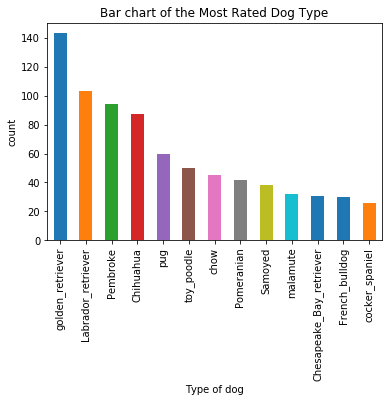

In [1368]:
Top_dog_type = combined_data.groupby('dog_type').filter(lambda x: len(x) >= 25)

Top_dog_type['dog_type'].value_counts().plot(kind = 'bar')
plt.title('Bar chart of the Most Rated Dog Type')
plt.xlabel('Type of dog')
plt.ylabel('count')

fig = plt.gcf() 


In [1369]:

dog_type_mean = combined_data.groupby('dog_type').mean()


In [1370]:
dog_type_mean.head()

,tweet_id,rating_numerator,rating_denominator,rating,id,favorite_count,retweet_count,img_num,Breed_1_confidence,Breed_1_present,Breed_2_confidence,Breed_2_present,Breed_3_confidence,Breed_3_present
dog_type,,,,,,,,,,,,,,
Afghan_hound,8.095999e+17,8.000000,10.0,8.000000,8.095999e+17,12191.500000,3602.5000,1.000000,0.513621,1.0000,0.077449,1.000000,0.067637,1.000000
Airedale,7.184489e+17,9.833333,10.0,9.833333,7.184489e+17,5280.833333,1393.7500,1.166667,0.583771,1.0000,0.129887,0.916667,0.083516,0.916667
American_Staffordshire_terrier,7.597284e+17,10.312500,10.0,10.312500,7.597284e+17,9380.187500,2310.8125,1.187500,0.641898,0.8125,0.146242,0.937500,0.052138,0.937500
Appenzeller,7.939334e+17,11.000000,10.0,11.000000,7.939334e+17,7317.500000,1458.0000,1.000000,0.503665,1.0000,0.152041,1.000000,0.130708,0.500000
Australian_terrier,7.785921e+17,11.500000,10.0,11.500000,7.785921e+17,11127.500000,3078.5000,2.000000,0.307584,1.0000,0.242234,1.000000,0.115970,1.000000


In [1371]:
 dog_type_mean['rating'].sort_values()
# japanese_spaniel has ow rating with 5.0 and clumber has highest rating with 27

dog_type
Japanese_spaniel                5.000000
Afghan_hound                    8.000000
soft-coated_wheaten_terrier     8.800000
Walker_hound                    9.000000
Scotch_terrier                  9.000000
Tibetan_terrier                 9.250000
dalmatian                       9.272727
Boston_bull                     9.416667
Saint_Bernard                   9.500000
Welsh_springer_spaniel          9.500000
Maltese_dog                     9.526316
Dandie_Dinmont                  9.571429
miniature_schnauzer             9.600000
Norwich_terrier                 9.600000
redbone                         9.666667
English_setter                  9.714286
Rhodesian_ridgeback             9.750000
Scottish_deerhound              9.750000
Irish_terrier                   9.800000
Great_Dane                      9.818182
Airedale                        9.833333
papillon                        9.833333
Mexican_hairless                9.857143
Newfoundland                    9.857143
miniatu

In [1372]:
 dog_type_count= combined_data.groupby('dog_type').count()
dog_type_count.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_stage,...,Possible_breed_1,Breed_1_confidence,Breed_1_present,Possible_breed_2,Breed_2_confidence,Breed_2_present,Possible_breed_3,Breed_3_confidence,Breed_3_present,confidence_list
dog_type,,,,,,,,,,,,,,,,,,,,,
Afghan_hound,2,2,2,2,2,2,2,2,2,0,...,2,2,2,2,2,2,2,2,2,2
Airedale,12,12,12,12,12,12,12,12,12,1,...,12,12,12,12,12,12,12,12,12,12
American_Staffordshire_terrier,16,16,16,16,16,16,16,16,16,3,...,16,16,16,16,16,16,16,16,16,16
Appenzeller,2,2,2,2,2,2,2,2,2,0,...,2,2,2,2,2,2,2,2,2,2
Australian_terrier,2,2,2,2,2,2,2,2,2,0,...,2,2,2,2,2,2,2,2,2,2


In [1373]:

dog_count = dog_type_count['rating']
dog_mean = dog_type_mean['rating']

In [1374]:
df = pd.DataFrame()
df['dog_type_count_values'] = dog_count
df['dog_type_mean_values'] = dog_mean
df

,dog_type_count_values,dog_type_mean_values
dog_type,,
Afghan_hound,2,8.000000
Airedale,12,9.833333
American_Staffordshire_terrier,16,10.312500
Appenzeller,2,11.000000
Australian_terrier,2,11.500000
Bedlington_terrier,6,10.333333
Bernese_mountain_dog,11,11.272727
Blenheim_spaniel,10,11.100000
Border_collie,12,10.583333


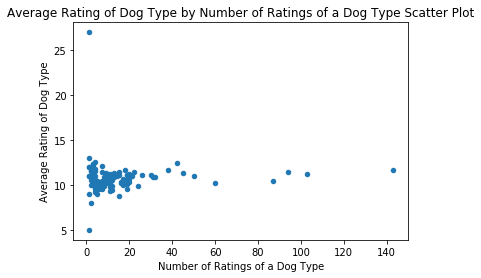

In [1375]:
df.plot(x='dog_type_count_values', y='dog_type_mean_values', kind='scatter')
plt.xlabel('Number of Ratings of a Dog Type')
plt.ylabel('Average Rating of Dog Type')
plt.title('Average Rating of Dog Type by Number of Ratings of a Dog Type Scatter Plot')

fig = plt.gcf()
#plt.savefig('X:/' + newName + '.png', 
fig.savefig('output2.png',bbox_inches='tight');